<a href="https://colab.research.google.com/github/Rish-3/Ytube-nwp/blob/main/google%20stock%20price%20DATA_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRIDICT THE PRICE OF STOCK USING LSTM NETWORK 

*import the library*

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import the training data set

1.   data preprpation 2. karas 3. evaluate



In [2]:
#from google.colab import files
#uploaded=files.upload()
dataset_train=pd.read_csv("/content/Google_Stock_Price_Train.csv")
training_set=dataset_train.iloc[:, 1:2].values

In [3]:
# , MinMaxScaler
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)




In [5]:
# creating the data structure with 60 timesteps and output 
x_train=[]
y_train=[]
for i in range(60, 1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i,0])
x_train, y_train=np.array(x_train),np.array(y_train)

# Reshaping 
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


***initializing the RNN***

In [6]:
# import the karas libraries and package
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
regressor=Sequential()

**Adding the some layer and some dropout regularization**

In [9]:
# adding the first LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [10]:
# adding the second LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))


In [11]:
# adding the third LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [12]:
# adding the fourth LSTM layer and some dropout regulation 
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

**8. adding the output layer**

In [13]:
# adding the output layer
regressor.add(Dense(units=1))

In [ ]:
# adding the output layer
regressor.add(Dense(units=1)) 


**Compile the RNN**

In [14]:
# compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# fitting the RNN to the Training set
regressor.fit(x_train,y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 23s 203ms/step - loss: 0.1253
Epoch 2/100
38/38 [==============================] - 7s 177ms/step - loss: 0.0854
Epoch 3/100
38/38 [==============================] - 8s 208ms/step - loss: 0.0829
Epoch 4/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0816
Epoch 5/100
38/38 [==============================] - 8s 209ms/step - loss: 0.0804
Epoch 6/100
38/38 [==============================] - 7s 178ms/step - loss: 0.0787
Epoch 7/100
38/38 [==============================] - 8s 209ms/step - loss: 0.0789
Epoch 8/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0780
Epoch 9/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0778
Epoch 10/100
38/38 [==============================] - 8s 208ms/step - loss: 0.0775
Epoch 11/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0779
Epoch 12/100
38/38 [==============================] - 8s 209ms/step - loss: 0.0779
Epoch 13/100

part 3 : making the predictions and visualizing the results


In [16]:
# getting real stock price of 2007
dataset_test=pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values


In [22]:
# getting the predicted stock price of 2017
dataset_total=pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price= regressor.predict(X_test)
# predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 58ms/step


ValueError: ignored

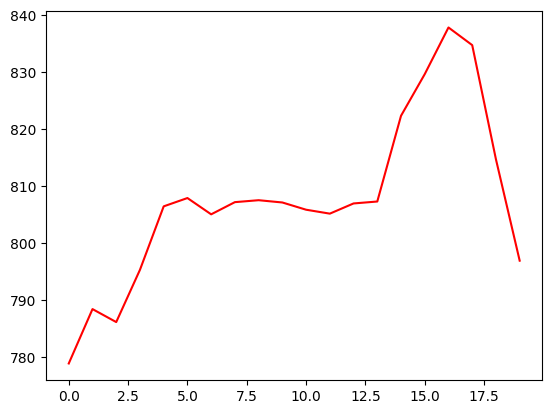

In [23]:
# visualising the result
plt.plot(real_stock_price, color='red', label='Real google stock price')
plt.plot(predicted_stock_price, color='blue', label='predicted Google stock price')
plt.title('google stock price prediction ')
plt.xlabel('Time')
plt.ylabel('google stock price')
plt.legend()
plt.show()